In [1]:
import sys
sys.path.append('../Codes/library/')
sys.path.append('../Codes/Python/')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import scipy.special as sc
import pandas as pd
from Immuno_models import*
N_A = 6.02214076e23
Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Evolution_Immune_System/Text_files/'

%autosave 60

Autosaving every 60 seconds


In [4]:
data_AB = pd.read_excel(Text_files_path+'Data/2021-12-29_CoV2NAbs_KV.xlsx', usecols=['Antibody name', 'Wu01', 'B1.1.7', 'B1.351', 'B1.429', 'B1.617', 'B1.617.2'])
data_S = pd.read_excel(Text_files_path+'Data/2021-12-29_CoV2NAbs_KV.xlsx', usecols=['Wu01S', 'B1.1.7S', 'B1.351S', 'B1.429S', 'B1.617S', 'B1.617.2S'], nrows=10)
donors = pd.read_excel(Text_files_path+'Data/2021-12-29_CoV2NAbs_KV.xlsx', usecols=['ID of donor'], nrows=10)
I = np.size(donors['ID of donor'])
J = np.size(data_AB['Antibody name'])
for i in np.arange(I):
    for j in np.arange(J):
        if(data_AB['Antibody name'][j].split('-')[0]==donors['ID of donor'][i]):
            data_AB['Antibody name']=data_AB['Antibody name'].replace([data_AB['Antibody name'][j]], donors['ID of donor'][i])
data_AB = data_AB.sort_values(['Antibody name', 'Wu01'])


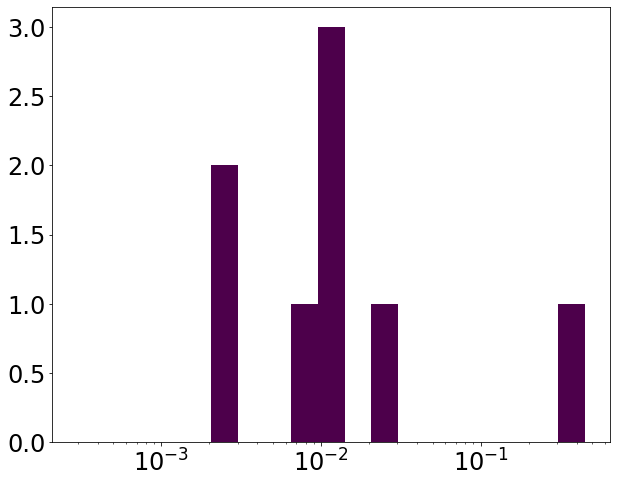

In [47]:
fig, ax = plt.subplots(figsize = (10,8))
colors_donors  = plt.cm.BuPu(np.linspace(0,1,I+5))
data_I = []
#for i in np.arange(I):
for i, donor in enumerate(['R207']):
    #data_i=data_AB.loc[data_AB['Antibody name']==donors['ID of donor'][i], 'Wu01'].to_list()
    data_i=data_AB.loc[data_AB['Antibody name']==donor, 'Wu01'].to_list()
    data_I.append(data_i)
ax.hist(data_I, bins=np.logspace(np.log10(np.min(data_i)), np.log10(np.max(data_i)), 20), histtype = 'barstacked', color = colors_donors[7:])
my_plot_layout(ax=ax, xscale='log', yscale='linear')


In [21]:
data_S['Wu01S'][[0, 3, 7]]

3     806.753617
4     581.913262
7    3392.334700
Name: Wu01S, dtype: float64

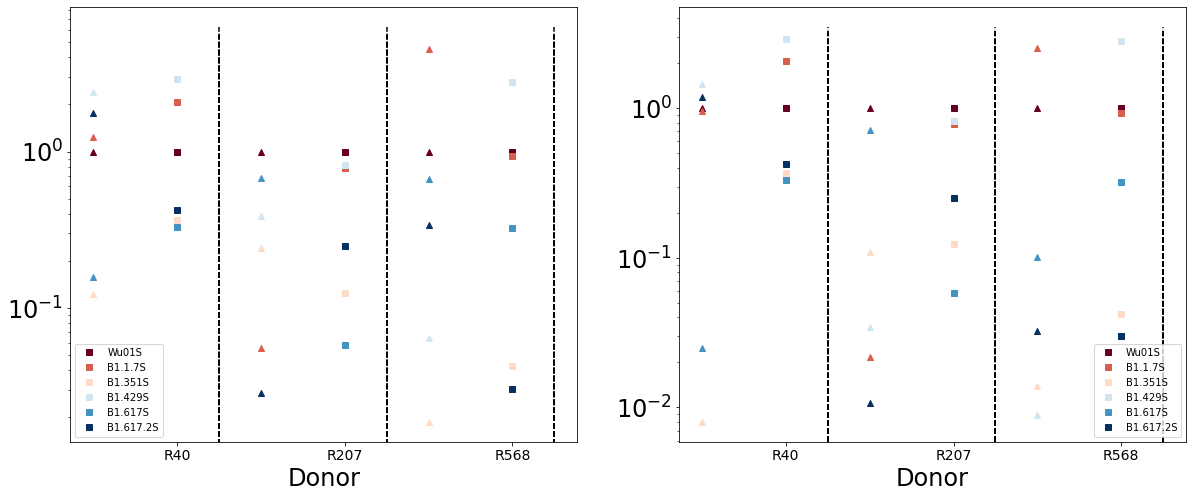

In [40]:
colors_variants  = plt.cm.RdBu(np.linspace(0,1,6))
fig, ax = plt.subplots(1, 2, figsize = (20,8))

for v, variant in enumerate(data_AB.columns[1:]):
    #for i in range(I):
    for i, donor in enumerate(['R40', 'R207', 'R568']):
        #temp_array=data_AB.loc[data_AB['Antibody name']==donors['ID of donor'][i], variant]
        #temp_array2=data_AB.loc[data_AB['Antibody name']==donors['ID of donor'][i], 'Wu01']
        temp_array=data_AB.loc[data_AB['Antibody name']==donor, variant]
        temp_array2=data_AB.loc[data_AB['Antibody name']==donor, 'Wu01']
        #ax[0].scatter(2*i, np.exp(np.average(np.log(temp_array2[temp_array!='>10'].to_list())))/np.exp(np.average(np.log(temp_array[temp_array!='>10'].to_list()))), color=colors_variants[v])
        ax[0].scatter(2*i, np.average(temp_array2[temp_array!='>10'].to_list())/np.average(temp_array[temp_array!='>10'].to_list()), color=colors_variants[v], marker = '^')
        weights = np.array([n**(-1/2) for n in range(1, len(temp_array2)+1)])
        weights=-np.log10(temp_array2)-np.min(-np.log10(temp_array2))+1
        weights=(1/temp_array2)**(2/3)
        weights=weights[temp_array!='>10']
        if weights.size != 0:
            #ax[1].scatter(2*i, np.exp(np.average(np.log(temp_array2[temp_array!='>10'].to_list()), weights=weights))/np.exp(np.average(np.log(temp_array[temp_array!='>10'].to_list()), weights=weights)), color=colors_variants[v])
            ax[1].scatter(2*i, np.average(temp_array2[temp_array!='>10'].to_list(), weights=weights)/np.average(temp_array[temp_array!='>10'].to_list(), weights=weights), color=colors_variants[v], marker = '^')

I=3
for v, variant in enumerate(data_S.columns[0:]):
    ax[0].plot(np.arange(1,2*I,2), data_S[variant][[0, 3, 7]]/data_S['Wu01S'][[0, 3, 7]], label = variant, marker = 's', linestyle='', color = colors_variants[v])
    ax[0].vlines(np.arange(1,2*I,2)+0.5, ax[0].get_ylim()[0], ax[0].get_ylim()[1], linestyle='--', color = 'black')
    ax[1].plot(np.arange(1,2*I,2), data_S[variant][[0, 3, 7]]/data_S['Wu01S'][[0, 3, 7]], label = variant, marker = 's', linestyle='', color = colors_variants[v])
    ax[1].vlines(np.arange(1,2*I,2)+0.5, ax[1].get_ylim()[0], ax[1].get_ylim()[1], linestyle='--', color = 'black')


ax[0].legend()
my_plot_layout(ax=ax[0], yscale='log', xlabel = 'Donor')
ax[0].set_xticks(np.arange(1,2*I,2))
ax[0].set_xticklabels(donors['ID of donor'][[0, 3, 7]], fontsize = 14);

ax[1].legend()
my_plot_layout(ax=ax[1], yscale='log', xlabel = 'Donor')
ax[1].set_xticks(np.arange(1,2*I,2))
ax[1].set_xticklabels(donors['ID of donor'][[0, 3, 7]], fontsize = 14);


## DeKosky et.al.

-1.9737539938926063 0.024195108770988186
-1.957196193024106 0.025422518933954644
-1.8384279686078508 0.005932113181301594
-1.7681809236145656 0.004091936253031811


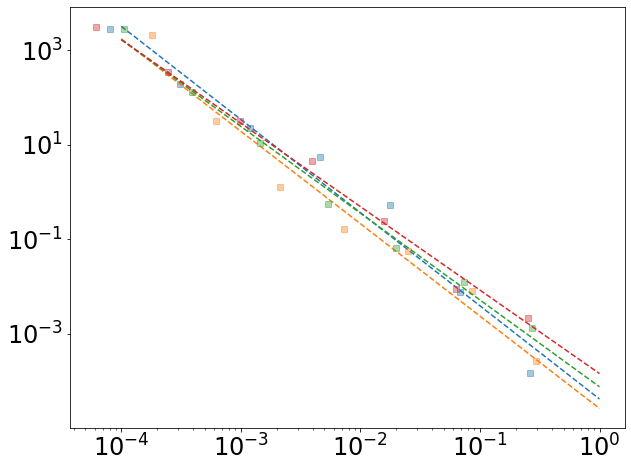

In [425]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18, 'right':.95, 'bottom':.15})

filenames = ['NBT-BC30284_IgG+Bcells_replicate1_linked_CDR3junction.txt', 
             'NBT-BC30284_IgG+Bcells_replicate2_linked_CDR3junction.txt', 
             'NBT-BC30284_D14FluBmems_linked_CDR3junction.txt', 
             'NBT-BC30284_D7TT+PBs_linked_CDR3junction.txt']
for filename in filenames:
    data = np.loadtxt(Text_files_path+'Data/Supplementary_Data/'+filename, skiprows=1, usecols=0)
    data = data/np.max(data)
    data_hist =np.histogram(data, density = True, bins = np.logspace(np.log10(np.min(data)), 0, 8))
    plot = ax.plot(data_hist[1][:-1], data_hist[0],alpha=.4, marker = 's', linestyle = '')
    popt_csd, pcov_csd = curve_fit(my_linear_func, np.log(data_hist[1][:-1][:]), np.log(data_hist[0][:]))
    ns = np.logspace(-4, 0, 100)#ax.plot(ns, np.exp(my_linear_func(ns, *popt_csd)))
    ax.plot(ns, np.exp(my_linear_func(np.log(ns), *popt_csd)), color = plot[0].get_color(), linestyle = '--')
    print(popt_csd[1], pcov_csd[1,1])

my_plot_layout(ax=ax, yscale = 'log', xscale = 'log')


-5.011529449426585
-4.908466837916575
-4.7071446287663266
-0.5062640698375191
-0.5152018397948477
-0.5353366072529864


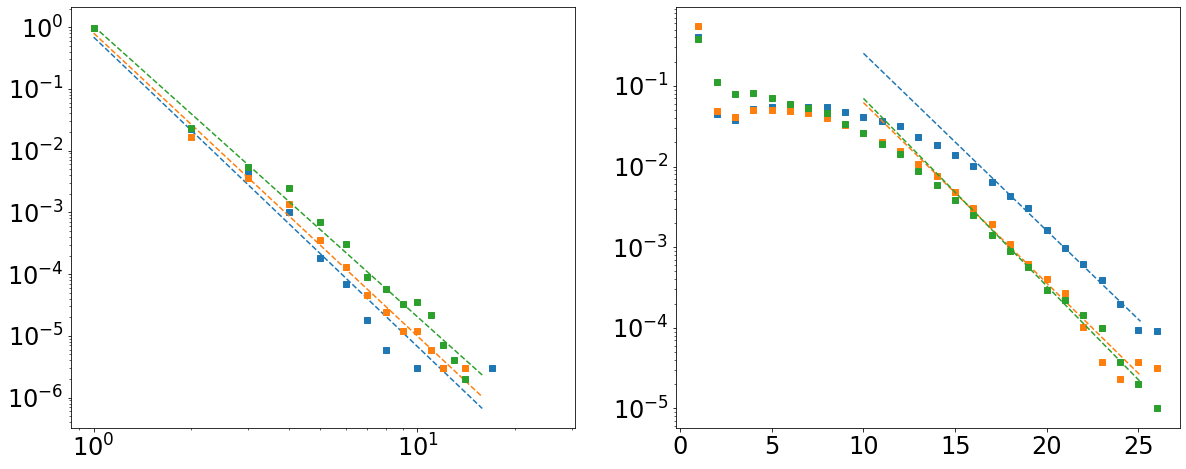

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(20,8), gridspec_kw={'left':0.18, 'right':.95, 'bottom':.15})
data = pd.ExcelFile(Text_files_path+'Data/'+'41586_2019_934_MOESM5_ESM.xlsx')
Cols = np.array([[0, 1], [3, 4], [6, 7], [9, 10], [12, 13], [15, 16]], dtype = object)
for cols in Cols[:3]:
    data1 = pd.read_excel(data, 'PANELB', usecols = cols, skiprows=1, nrows = 26, header = 0, names = ['Germline divergence', 'Normalized frequency'])
    #print(np.where(data1['Normalized frequency']!=0)[0])
    my_plot=ax[0].plot(data1['Germline divergence']+1, data1['Normalized frequency'], linestyle = '', marker = 's')
    popt_csd, pcov_csd = curve_fit(my_linear_func, np.log(data1['Germline divergence'][np.where(data1['Normalized frequency']!=0)[0]]+1), np.log(data1['Normalized frequency'][np.where(data1['Normalized frequency']!=0)[0]]))
    ns = np.logspace(0, 1.2, 100)#ax.plot(ns, np.exp(my_linear_func(ns, *popt_csd)))
    ax[0].plot(ns, np.exp(my_linear_func(np.log(ns), *popt_csd)), color = my_plot[0].get_color(), linestyle = '--')
    print(popt_csd[1])
my_plot_layout(ax=ax[0], yscale = 'log', xscale='log')
for cols in Cols[3:]:
    data1 = pd.read_excel(data, 'PANELB', usecols = cols, skiprows=1, nrows = 26, header = 0, names = ['Germline divergence', 'Normalized frequency'])
    #print(np.where(data1['Normalized frequency']!=0)[0])
    my_plot=ax[1].plot(data1['Germline divergence']+1, data1['Normalized frequency'], linestyle = '', marker = 's')
    popt_csd, pcov_csd = curve_fit(my_linear_func, data1['Germline divergence'][np.where(data1['Normalized frequency']!=0)[0][-10:]]+1, np.log(data1['Normalized frequency'][np.where(data1['Normalized frequency']!=0)[0][-10:]]))
    ns = np.logspace(1, 1.4, 100)#ax.plot(ns, np.exp(my_linear_func(ns, *popt_csd)))
    ax[1].plot(ns, np.exp(my_linear_func(ns, *popt_csd)), color = my_plot[0].get_color(), linestyle = '--')
    print(popt_csd[1])
my_plot_layout(ax=ax[1], yscale = 'log', xscale='linear')




-8.911691176470715 -9.11871323529542


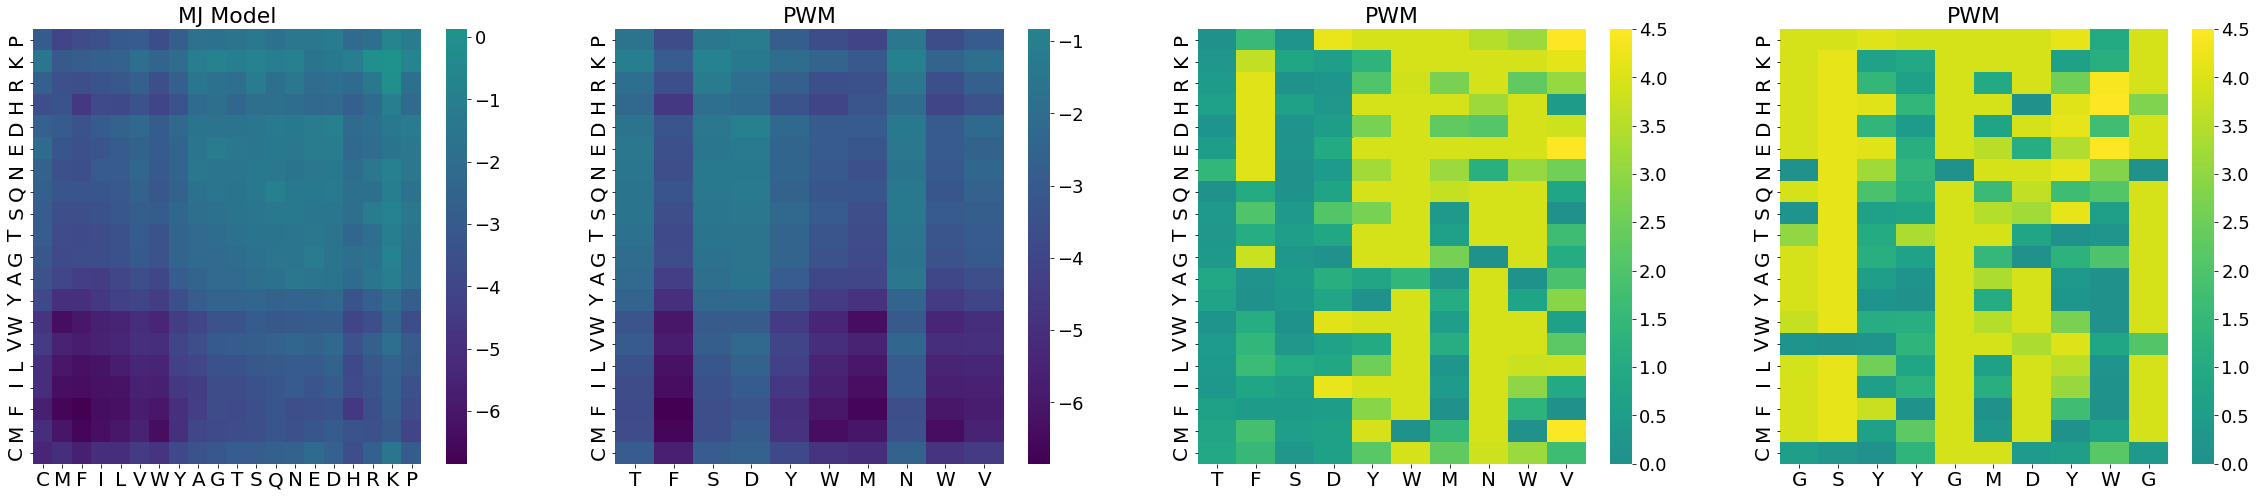

In [5]:
#Matrix = 'BLOSUM62'
Matrix = 'MJ2'
#Matrix = 'MM'

fig, ax = plt.subplots(1, 4, figsize=(40,8))

if(Matrix == 'MJ2'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,21))
    M2_list = M2.tolist()
    Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'MJ Model', ax = ax[0])
if(Matrix == 'MM'):
    M2 = (np.loadtxt(Text_files_path + Matrix + '.txt')+1)*e0
    M2_list = M2.tolist()
    Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'MJ Model', ax = ax[0])
if(Matrix == 'BLOSUM62'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,25))
    M2_list = M2.tolist()
    Alphabet = np.array(['A', 'R'  ,'N' , 'D'  ,'C' , 'Q'  ,'E'  ,'G'  ,'H' , 'I'  ,'L'  ,'K'  ,'M' , 'F' , 'P' , 'S'  ,'T' , 'W' , 'Y' , 'V' , 'B' , 'Z'  ,'X',  '*'])
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'BLOSUM62 Model', ax = ax[0])
L_alphabet = len(Alphabet)
#----------------------------------------------------------------------

#antigen_seq = np.random.randint(0, len(Alphabet), L)
#antigen = Alphabet[antigen_seq]
antigen = 'TFSDYWMNWV'
H1 = 'TFSDYWMNWV'
H3 = 'GSYYGMDYWG'
MHC = ''
L = len(antigen)
antigen_list = [i for i in antigen]
contributions = np.zeros(shape = (1,20))
antigen_seq = np.array([], dtype = int)
for i, aa in enumerate(antigen_list):
    index = Alphabet_list.index(aa)
    antigen_seq = np.append(antigen_seq, int(index))

PWM = M2[:,antigen_seq]

file_PWM_H1 = open(Text_files_path + '/Data/PWM_Adams_etal_2016_1.pkl', 'rb')
file_PWM_H3 = open(Text_files_path + '/Data/PWM_Adams_etal_2016_2.pkl', 'rb')


log10Kd_WT = -8.911691176470715

#PWM_H1_data = np.log(10)*(log10Kd_WT - (pickle.load(file_PWM_H1)))
#PWM_H3_data = np.log(10)*(log10Kd_WT - (pickle.load(file_PWM_H3)))
#log10Kd_OPT = log10Kd_WT + ((PWM_H1_data[0, 2]) + (PWM_H1_data[15, 3]) + (PWM_H3_data[1, 1]) + (PWM_H3_data[9, 2]) + (PWM_H3_data[19, 6]) + (PWM_H3_data[4, 8]))*np.log10(np.exp(1))

PWM_Collesano = pd.read_csv(Text_files_path + 'Data/Collesano_2022.csv')
PWM_H1_data = -(log10Kd_WT - (pickle.load(file_PWM_H1)))
PWM_H3_data = -(log10Kd_WT - (pickle.load(file_PWM_H3)))

log10Kd_OPT = log10Kd_WT - ((PWM_H1_data[0, 2]) + (PWM_H1_data[15, 3]) + (PWM_H3_data[1, 1]) + (PWM_H3_data[9, 2]) + (PWM_H3_data[19, 6]) + (PWM_H3_data[4, 8]))

file_PWM_H1.close()
file_PWM_H3.close()

alphabet_data = np.array(['G', 'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W', 'S', 'T', 'N', 'Q', 'C', 'P', 'H', 'K', 'R', 'D', 'E'])

WT_seq = np.array(['T', 'F', 'S', 'D', 'Y', 'W', 'M', 'N', 'W', 'V'])

#PWMs from data with the same order of aas as my MJ matrix
PWM_H1_data_2 = np.ones_like(PWM_H1_data)
PWM_H3_data_2 = np.ones_like(PWM_H3_data)


for i in np.arange(L_alphabet):
    PWM_H1_data_2[i,:] = PWM_H1_data[np.where(Alphabet==alphabet_data[i])[0][0], :]
    PWM_H3_data_2[i,:] = PWM_H3_data[np.where(Alphabet==alphabet_data[i])[0][0], :]
#Change values by the minimum
for i in np.arange(L):
    #PWM[:,i]-=np.min(PWM[:,i], axis=0)
    PWM_H1_data[:,i]-=np.min(PWM_H1_data[:,i], axis=0)
    PWM_H1_data_2[:,i]-=np.min(PWM_H1_data_2[:,i], axis=0)
    PWM_H3_data[:,i]-=np.min(PWM_H3_data[:,i], axis=0)
    PWM_H3_data_2[:,i]-=np.min(PWM_H3_data_2[:,i], axis=0)

print(log10Kd_WT, log10Kd_OPT)

PWM_list = PWM.tolist()
PWM_H1_data_list = PWM_H1_data.tolist()
PWM_H1_data_2_list = (PWM_H1_data_2).tolist()
PWM_H3_data_list = PWM_H3_data.tolist()
PWM_H3_data_2_list = (PWM_H3_data_2).tolist()

plot_PWM(PWM=PWM_list, Alphabet=Alphabet, sequence = antigen, title=r'PWM', ax = ax[1])
plot_PWM(PWM=PWM_H1_data_2_list, Alphabet=Alphabet, sequence = H1, title=r'PWM', ax = ax[2])
plot_PWM(PWM=PWM_H3_data_2_list, Alphabet=Alphabet, sequence = H3, title=r'PWM', ax = ax[3])

min_E = np.sum([np.min(PWM[:,i]) for i in range(len(PWM[0,:]))])
avg_E = np.sum([np.mean(PWM[:,i]) for i in range(len(PWM[0,:]))])
var_E = np.sum([np.var(PWM[:,i]) for i in range(len(PWM[0,:]))])
max_E = np.sum([np.max(PWM[:,i]) for i in range(len(PWM[0,:]))])

min_E_data = np.sum([np.min(PWM_H3_data[:,i]) for i in range(len(PWM_H3_data[0,:]))])
avg_E_data = np.sum([np.mean(PWM_H3_data[:,i]) for i in range(len(PWM_H3_data[0,:]))])
var_E_data = np.sum([np.var(PWM_H3_data[:,i]) for i in range(len(PWM_H3_data[0,:]))])
max_E_data = np.sum([np.max(PWM_H3_data[:,i]) for i in range(len(PWM_H3_data[0,:]))])
#print(np.exp(min_E_data), np.exp(avg_E_data))
#----------------------------------------------------------------------

#----------------------------------------------------------------------

#linear_PWM = np.reshape(PWM, (L*20,1))
#linear_PWM_data = np.reshape(PWM_data, (L*20,1))
#ax[3].hist(linear_PWM, bins = 20, alpha = .5, align='left', label = 'MJ')
#ax[3].hist(linear_PWM_data, bins = 20, alpha = .5, align='left', label = 'Adams etal 2016')
#my_plot_layout(ax=ax[3], xscale = 'linear')
#ax[3].legend(loc = 0, fontsize = 20, title = r'Model', title_fontsize = 22)
#fig.savefig('../Figures/5_Geometric_exponent/PWM_model_with_data.png')


In [3]:
2**11

2048

6.520672952868296 bits
-0.02067113891944852 bits


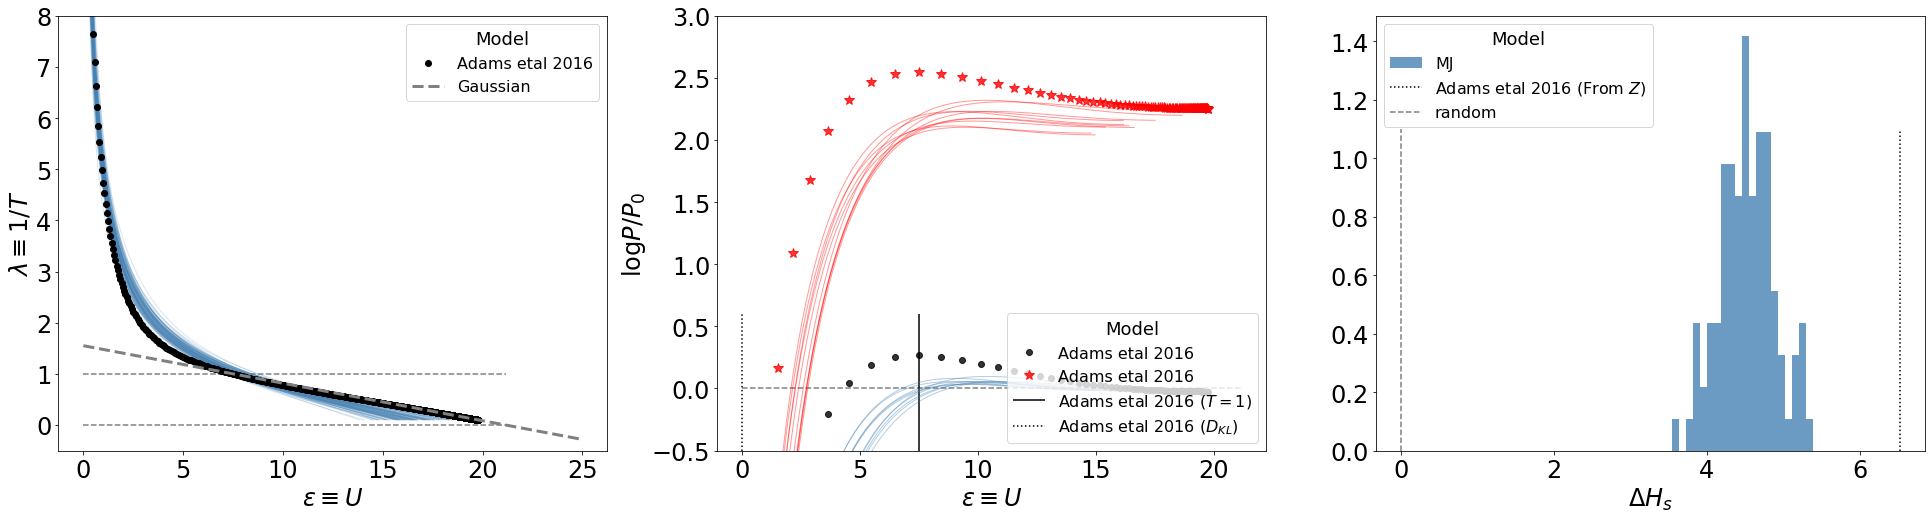

In [5]:
Tmin = .001
Tmax = 10

es = np.linspace(0, 25, 100)
de = es[1]-es[0]
#e0 = mean_lowest_effect
#d = d_eff
L = 10
Ts = np.linspace(Tmin, Tmax, 100000)
fig, ax = plt.subplots(1, 3, figsize=(36,8), gridspec_kw={'left':0.18})
Hs_shannon = np.array([])
for n in np.arange(100):
    antigen_seq = np.random.randint(0, len(Alphabet), L)
    PWM = M2[:,antigen_seq]
    for i in np.arange(L):
        PWM[:,i]-=np.min(PWM[:,i], axis=0)
    Us_bar = np.sum([np.mean(PWM[:,i]) for i in range(len(PWM[0,:]))])
    Us_var = np.sum([np.var(PWM[:,i]) for i in range(len(PWM[0,:]))])
    F_PWM = -Ts*np.log(Z_PWM(PWM, Ts))
    Us = F_PWM[:-1]-Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts))
    lambdas = 1/Ts[:-1]
    ax[0].plot(Us, lambdas, linewidth = 1, alpha = .2, linestyle = '-', color = 'steelblue')
    #----------------------------------------------------------------------
    dU = np.diff(Us)
    H = np.cumsum(lambdas[:-1]*dU)
    Q = np.exp(H)/np.sum(np.exp(H)*dU)
    #ax.plot(Us[:-1], H, linestyle = '--')
    H_random = -(Us[:-1]-Us_bar)**2/(2*Us_var) + L*np.log(20) - 0.5*np.log(2*np.pi*Us_var)
    P0 = np.exp(H_random)/np.sum(np.exp(H_random)*dU)
    #ax.plot(Us, H_random, linestyle = ':')
    if(n%10==0):
        ax[1].plot(Us[:-1][::100], np.log(Q/P0)[::100], linewidth = 1, alpha = .4, linestyle = '-', color = 'steelblue')
        ax[1].plot(Us[:-1][::100], (H-H_random)[::100], linewidth = 1, alpha = .4, linestyle = '-', color = 'red')
    #----------------------------------------------------------------------
    PWM_exp = np.exp(PWM)
    for i in np.arange(L):
        PWM_exp[:, i]=PWM_exp[:, i]/np.sum(PWM_exp[:, i])
    H_shannon = 0
    for i in np.arange(L):
        H_shannon+=(np.sum(-PWM_exp[:,i]*np.log(PWM_exp[:,i])))
    Hs_shannon = np.append(Hs_shannon, H_shannon)
    #----------------------------------------------------------------------
ax[2].hist(L*np.log2(20) - Hs_shannon/np.log(2) , bins = 20, density=True, label = 'MJ', color = 'steelblue', alpha = .8)
#----------------------------------------------------------------------
#----------------------------------------------------------------------
Us_bar = np.sum([np.mean(PWM_H1_data[:,i]) for i in range(len(PWM_H1_data[0,:]))])
Us_var = np.sum([np.var(PWM_H1_data[:,i]) for i in range(len(PWM_H1_data[0,:]))])
F_PWM = -Ts*np.log(Z_PWM(PWM_H1_data, Ts))
Us = F_PWM[:-1]-Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts))
lambdas = 1/Ts[:-1]
ax[0].plot(Us[::100], lambdas[::100], linewidth = 2, alpha = 1, linestyle = '',marker = 'o', color = 'black', label = 'Adams etal 2016')
#----------------------------------------------------------------------
dU = np.diff(Us)
H = np.cumsum(lambdas[:-1]*dU)
Q = np.exp(H)/np.sum(np.exp(H)*dU)
#ax.plot(Us[:-1], H, linestyle = '--')
H_random = -(Us[:-1]-Us_bar)**2/(2*Us_var) + L*np.log(20) - 0.5*np.log(2*np.pi*Us_var)
P0 = np.exp(H_random)/np.sum(np.exp(H_random)*dU)
#ax.plot(Us, H_random, linestyle = ':')
KL_D = np.sum(np.log(Q/P0)*Q*dU)
KL_D2 = np.sum((H-H_random)*dU*Q)
ax[1].plot(Us[:-1][::1000], np.log(Q/P0)[::1000], linewidth = 2, alpha = .8, linestyle = '',marker = 'o', color = 'black', label = 'Adams etal 2016')
ax[1].plot(Us[:-1][::1000], (H-H_random)[::1000], linewidth = 2, alpha = .8, linestyle = '',marker = '*', ms = 10, color = 'red', label = 'Adams etal 2016')
#----------------------------------------------------------------------
PWM_data_exp = np.exp(PWM_H3_data)
for i in np.arange(L):
    PWM_data_exp[:, i]=PWM_data_exp[:, i]/np.sum(PWM_data_exp[:, i])
H_shannon = 0
for i in np.arange(L):
    H_shannon+=(np.sum(-PWM_data_exp[:,i]*np.log(PWM_data_exp[:,i])))
    
ax[2].vlines([L*np.log2(20) - H_shannon/np.log(2)], 0, 1.1, colors = ['black'], linestyles = [':'], label = r'Adams etal 2016 (From $Z$)')
#ax[2].vlines([-np.sum(KL_D*dU)/np.log(2)], 0, 1.1, colors = 'black', linestyle= '-', label = r'Adams etal 2016 $(D_{KL})$')
ax[2].vlines([0], 0, 1.1, colors = ['grey'], linestyles = ['--'], label = 'random')
print(L*np.log2(20) - H_shannon/np.log(2), 'bits')
print(-np.sum(KL_D*dU)/np.log(2), 'bits')
#----------------------------------------------------------------------
ax[0].plot(es[:], -(es[:]-Us_bar)/(Us_var), label = 'Gaussian', linewidth = 3, color = 'grey', linestyle = '--')
ax[0].hlines([0, 1], 0, Us_bar, color = 'grey', linestyle = '--')
ax[0].legend(loc = 0, fontsize = 16, title = r'Model', title_fontsize = 18)
ax[0].set_ylim(-.5, 8)
my_plot_layout(ax=ax[0], xscale = 'linear', yscale = 'linear', ylabel = '$\lambda\equiv 1/T$', xlabel = r'$\epsilon\equiv U$')
#----------------------------------------------------------------------
ax[1].hlines([0], 0, Us_bar, color = 'grey', linestyle = '--')
ax[1].vlines(Us[np.where(lambdas<1)][0], -.5, .6, color = 'black', linestyle = '-', label = r'Adams etal 2016 ($T=1$)')
ax[1].vlines(Us[np.where(KL_D==np.max(KL_D))][0], -.5, .6, color = 'black', linestyle = ':', label = r'Adams etal 2016 $(D_{KL})$')
my_plot_layout(ax=ax[1], xscale = 'linear', yscale = 'linear', ylabel = '$\log{P/P_0}$', xlabel = r'$\epsilon\equiv U$')
ax[1].legend(loc = 4, fontsize = 16, title = r'Model', title_fontsize = 18)
ax[1].set_ylim(-.5, 3);
#----------------------------------------------------------------------
my_plot_layout(ax=ax[2], xscale = 'linear', yscale = 'linear', xlabel = '$\Delta H_s$')
ax[2].legend(loc = 2, fontsize = 16, title = r'Model', title_fontsize = 18)



In [ ]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

ax.hist(L*np.log2(20) - Hs_shannon/np.log(2) , bins = 20, density=True, label = 'MJ', color = 'steelblue', alpha = .8)
PWM_data_exp = np.exp(PWM_data)
for i in np.arange(L):
    PWM_data_exp[:, i]=PWM_data_exp[:, i]/np.sum(PWM_data_exp[:, i])
H_shannon = 0
for i in np.arange(L):
    H_shannon+=(np.sum(-PWM_data_exp[:,i]*np.log(PWM_data_exp[:,i])))
ax.vlines([L*np.log2(20) - H_shannon/np.log(2)], 0, 1.1, colors = ['black'], linestyles = ['-'], label = 'Adams etal 2016')
ax.vlines([-np.sum(KL_D*dU)/np.log(2)], 0, 1.1, colors = 'grey', linestyle= ':', label = 'Adams etal 2016 2')
ax.vlines([0], 0, 1.1, colors = ['grey'], linestyles = ['--'], label = 'random')

print(2**(L*np.log2(20) - H_shannon/np.log(2)), 'states')
print(2**(-np.sum(KL_D*dU)/np.log(2)), 'states')
my_plot_layout(ax=ax, xscale = 'linear', yscale = 'linear', xlabel = '$\Delta H_s$')
ax.legend(loc = 9, fontsize = 14, title = r'Model', title_fontsize = 18)
ax.set_xticklabels([]);
ax.set_yticklabels([]);




In [ ]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

Tmin = .00001
Tmax = 10
Ts = np.linspace(Tmin, Tmax, 100000)

Us_bar = np.sum([np.mean(PWM_data[:,i]) for i in range(len(PWM_data[0,:]))])
Us_var = np.sum([np.var(PWM_data[:,i]) for i in range(len(PWM_data[0,:]))])
F_PWM = -Ts*np.log(Z_PWM(PWM_data, Ts))
Us = F_PWM[:-1]-Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts))
lambdas = 1/Ts[:-1]
#----------------------------------------------------------------------
dU = np.diff(Us)
H = np.cumsum(lambdas[:-1]*dU)#/np.sum(np.exp(np.cumsum(lambdas[:-1]*dU))*dU)
H_random = -(Us-Us_bar)**2/(2*Us_var) + L*np.log(20) - 0.5*np.log(2*np.pi*Us_var)#/np.sum(np.exp(-(Us[:-1]-Us_bar)**2/(2*Us_var))*dU)
KL_D = H-H_random[:-1]
ax.plot(Us[:-1], H, linestyle = '--')
ax.plot(Us, H_random, linestyle = '--')
#ax.plot(Us[:-1], H/H_random[:-1])
ax.hlines(0, 0, avg_E_data)

my_plot_layout(ax=ax, xscale = 'linear', yscale = 'linear', xlabel = '$\epsilon$')

print(np.sum(KL_D*dU*np.exp(H)/(np.sum(np.exp(H)*dU)))/np.log(2))
print(np.sum(KL_D*dU)/np.log(2))



In [29]:
RT = 0.593
DGs = np.array([-.68, -.63, -.68, -.56, -.29, -.72, -.33, -.16, -0.16, -.68, -.63, -.68, -.56, -.29, -.72, -.33, -.16])
Ks = np.exp(-DGs/(RT))
DG = np.sum(DGs)
K = np.exp(-DG/(RT))
K2 = np.product(Ks)
print(DGs, Ks)
print('%0.1f'%DG, ', %0.2e'%K, ', %0.2e'%K2)


[-0.68 -0.63 -0.68 -0.56 -0.29 -0.72 -0.33 -0.16 -0.16 -0.68 -0.63 -0.68
 -0.56 -0.29 -0.72 -0.33 -0.16] [3.14782468 2.89329099 3.14782468 2.57114354 1.63074797 3.36748192
 1.74454262 1.30972148 1.30972148 3.14782468 2.89329099 3.14782468
 2.57114354 1.63074797 3.36748192 1.74454262 1.30972148]
-8.3 , 1.12e+06 , 1.12e+06


In [83]:
print('%.0e'%2**13, '%.0e'%2**17)

8e+03 1e+05


In [43]:
PWM_Collesano = pd.read_csv(Text_files_path + 'Data/Collesano_2022.csv')


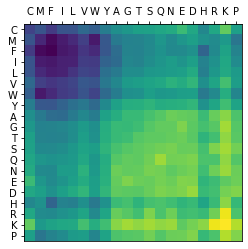

In [44]:
fig, ax = plt.subplots()
ax.imshow(M2)
ax.set_xticks(range(20))
ax.set_xticklabels(Alphabet);
ax.set_yticks(range(20))
ax.set_yticklabels(Alphabet);
ax.xaxis.tick_top()

In [23]:
alphabet_data_Collesano = np.array(['R','H','K','D','E','S','T', 'N', 'Q', 'C','G', 'P','A','V','I','L', 'M', 'F','Y','W'])


In [38]:
MJ_matrix = np.ones_like(M2)
for l in range(len(Alphabet)):
    MJ_matrix[l,:] = M2[np.where(Alphabet==alphabet_data_Collesano[l])[0][0],:]
MJ_temp = np.copy(MJ_matrix)
for l in range(len(Alphabet)):
    MJ_matrix[:, l] = MJ_temp[:, np.where(Alphabet==alphabet_data_Collesano[l])[0][0]]

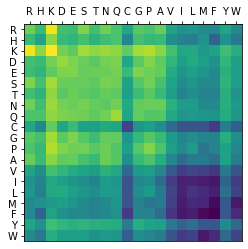

In [40]:
fig, ax = plt.subplots()
ax.imshow(MJ_matrix.transpose())
ax.set_xticks(range(20))
ax.set_xticklabels(alphabet_data_Collesano);
ax.set_yticks(range(20))
ax.set_yticklabels(alphabet_data_Collesano);
ax.xaxis.tick_top()

In [54]:
(np.log(6.02) + 11*np.log(10))/4


6.780880820563809

In [169]:
12*np.log(10)

27.63102111592855

In [171]:
'%.1e'%20**10

'1.0e+13'

In [85]:
np.log((1e8/N_A)*1e3*60*60*24*1e6)

-4.244210407252749